# Data Visualization

## Preliminaries

Import Dependencies

In [2]:
import pandas as pd
import geopandas as gpd
import pyproj
import numpy as np
from matplotlib import pyplot as plt

Set Province

In [1]:
province = "Quezon"

Load Results

In [3]:
file = f'../04_results/{province}/01_spatiotemporal/{province}_results.csv'

results = pd.read_csv(file, index_col="Unnamed: 0")

results.head()

PSGC Municipality  idarea        Date  n       exp      base   
1  405601000     Agdangan       1  2021-01-01  1  2.699344  1.470783  \
2  405601000     Agdangan       1  2021-01-02  1  2.699344  1.377033   
3  405601000     Agdangan       1  2021-01-03  1  2.699344  0.956920   
4  405601000     Agdangan       1  2021-01-04  1  2.699344  0.871504   
5  405601000     Agdangan       1  2021-01-05  1  2.699344  0.876992   

      typeI    typeII   typeIII  
1  1.029448  1.118306  2.255966  
2  0.985606  1.133135  2.315677  
3  0.870298  0.980547  1.005559  
4  0.823666  0.933167  1.147888  
5  0.812768  1.001936  1.049887

## Plot All Results as Line Graph

In [4]:
df_results = results[['PSGC', 'Municipality', 'Date', 'typeII', 'n']]
df_results.head()

PSGC Municipality        Date    typeII  n
1  405601000     Agdangan  2021-01-01  1.118306  1
2  405601000     Agdangan  2021-01-02  1.133135  1
3  405601000     Agdangan  2021-01-03  0.980547  1
4  405601000     Agdangan  2021-01-04  0.933167  1
5  405601000     Agdangan  2021-01-05  1.001936  1

C:\Users\diana\AppData\Local\Temp\ipykernel_20324\1997264122.py:28: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


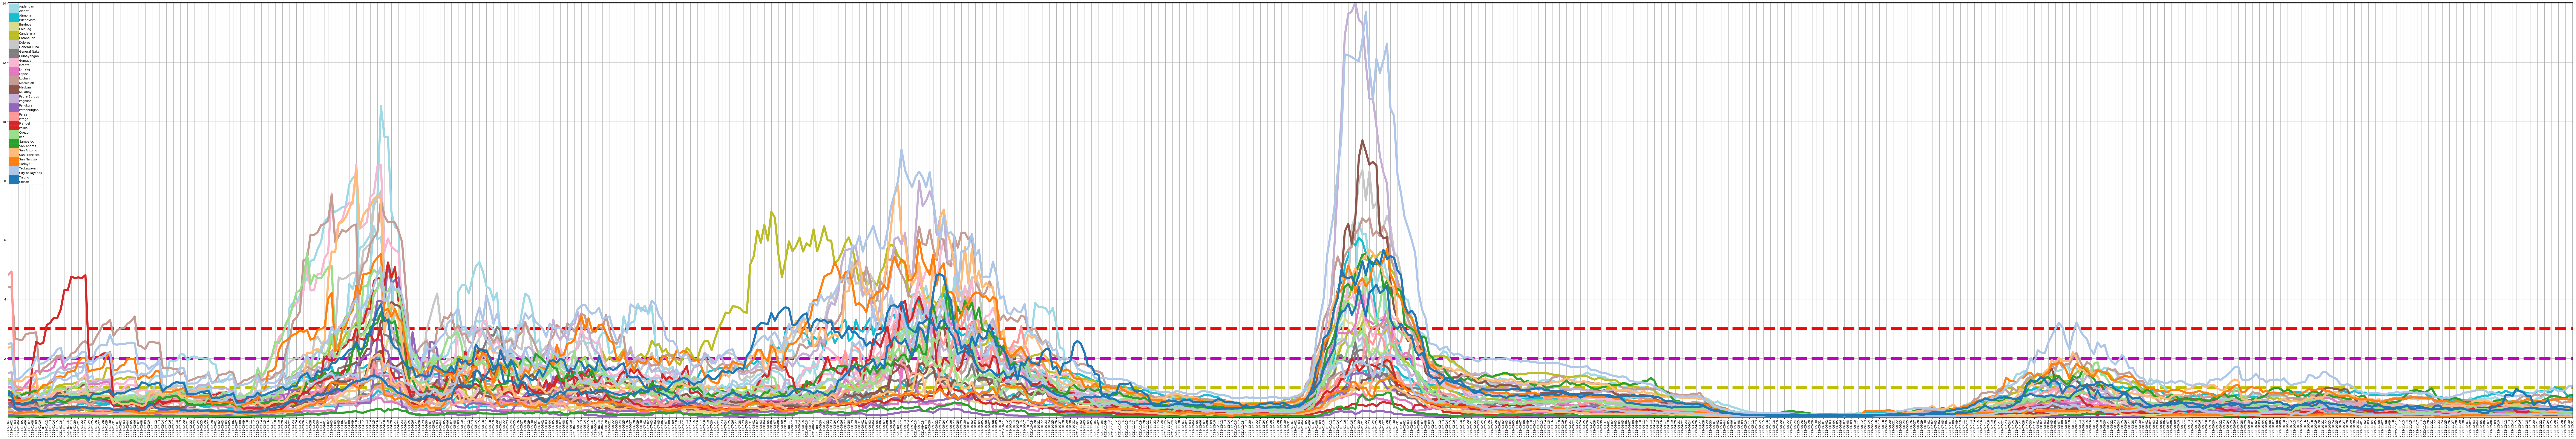

In [8]:
mun_codes = df_results['PSGC'].unique().tolist()

plt.figure(figsize=(120,20))
plt.xticks(rotation=90)
plt.tight_layout()
plt.margins(0,0)


# add RR thresholds
plt.axhline(y=1, color='y', linestyle='--', linewidth=10)
plt.axhline(y=2, color='m', linestyle='--', linewidth=10)
plt.axhline(y=3, color='r', linestyle='--', linewidth=10)

# set colors for lines
n = len(mun_codes)
colors = plt.cm.tab20(np.linspace(0,1,n)).tolist()

for code in mun_codes:
    df = df_results[df_results['PSGC'] == code]
    mun = df.iloc[0]['Municipality']

    plt.plot(df['Date'], df['typeII'], linestyle='-', linewidth=7, label=mun, color=colors.pop())


plt.rcParams.update({'font.size': 10})
leg = plt.legend(loc='upper left', prop={'size': 10})

for legobj in leg.legendHandles:
    legobj.set_linewidth(15.0)

plt.grid()
plt.show()

## Create Choropleth Animation

<Axes: >

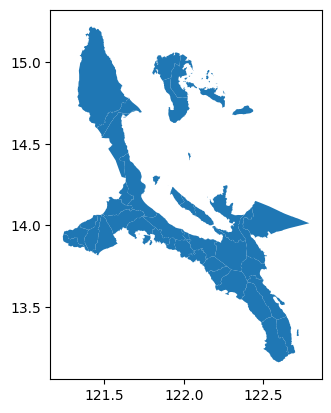

In [9]:

sf = gpd.read_file(f"../01_data/01_processed/02_filtered_shapefiles/{province}/{province}.shp")
sf.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
sf.plot()

In [10]:
sf

adm1_psgc  adm2_psgc  adm3_psgc          adm3_en geo_level  len_crs   
0   400000000  405600000  405601000         Agdangan       Mun    34244  \
1   400000000  405600000  405602000           Alabat       Mun    55435   
2   400000000  405600000  405603000         Atimonan       Mun   106626   
3   400000000  405600000  405605000       Buenavista       Mun    80702   
4   400000000  405600000  405606000          Burdeos       Mun   235220   
5   400000000  405600000  405607000          Calauag       Mun   234811   
6   400000000  405600000  405608000       Candelaria       Mun    73581   
7   400000000  405600000  405610000        Catanauan       Mun   100560   
8   400000000  405600000  405615000          Dolores       Mun    39004   
9   400000000  405600000  405616000     General Luna       Mun    66219   
10  400000000  405600000  405617000    General Nakar       Mun   216523   
11  400000000  405600000  405618000      Guinayangan       Mun   132119   
12  400000000  405600000  405619000           Gumaca       Mun   108131   
13  400000000  405600000  405620000          Infanta       Mun   122424   
14  400000000  405600000  405621000          Jomalig       Mun    37310   
15  400000000  405600000  405622000            Lopez       Mun   134761   
16  400000000  405600000  405623000           Lucban       Mun    68380   
17  400000000  405600000  405625000        Macalelon       Mun    58395   
18  400000000  405600000  405627000           Mauban       Mun   174202   
19  400000000  405600000  405628000          Mulanay       Mun    89512   
20  400000000  405600000  405629000     Padre Burgos       Mun    80288   
21  400000000  405600000  405630000         Pagbilao       Mun   124088   
22  400000000  405600000  405631000        Panukulan       Mun   142724   
23  400000000  405600000  405632000      Patnanungan       Mun   126339   
24  400000000  405600000  405633000            Perez       Mun    38493   
25  400000000  405600000  405634000           Pitogo       Mun    65481   
26  400000000  405600000  405635000         Plaridel       Mun    28843   
27  400000000  405600000  405636000          Polillo       Mun   116630   
28  400000000  405600000  405637000           Quezon       Mun    59968   
29  400000000  405600000  405638000             Real       Mun   157122   
30  400000000  405600000  405639000         Sampaloc       Mun    50787   
31  400000000  405600000  405640000       San Andres       Mun    98663   
32  400000000  405600000  405641000      San Antonio       Mun    49795   
33  400000000  405600000  405642000    San Francisco       Mun   109743   
34  400000000  405600000  405644000      San Narciso       Mun   141226   
35  400000000  405600000  405645000          Sariaya       Mun    89698   
36  400000000  405600000  405646000       Tagkawayan       Mun   150371   
37  400000000  405600000  405647000  City of Tayabas      City    96535   
38  400000000  405600000  405648000           Tiaong       Mun    71264   
39  400000000  405600000  405649000           Unisan       Mun    65151   

      area_crs  len_km  area_km2   
0     35570335      34      35.0  \
1     60379983      55      60.0   
2    221201475     106     221.0   
3    171222657      80     171.0   
4    234301453     235     234.0   
5    312322396     234     312.0   
6    136742366      73     136.0   
7    253178824     100     253.0   
8     65964175      39      65.0   
9    100002066      66     100.0   
10  1321833442     216    1321.0   
11   225565295     132     225.0   
12   185168159     108     185.0   
13   172223841     122     172.0   
14    51826710      37      51.0   
15   377053153     134     377.0   
16   138218290      68     138.0   
17   103948920      58     103.0   
18   409469512     174     409.0   
19   276021891      89     276.0   
20    75671199      80      75.0   
21   175162043     124     175.0   
22   210171901     142     210.0   
23    95878288     126      95.0   
24    52403135      38      

In [13]:
import ipywidgets as widgets
from ipywidgets import interact
import time
import matplotlib.animation as animation

missingtypes = ['type1','type2']
typerist = ['typeI','typeII']

def plot_choropleth(ind):

    labels = sf['adm3_psgc'].unique().tolist()

    #labels = [
    #    "Bagamanoc", "Baras", "Bato", "Caramoran", "Gigmoto", "Pandan",
    #    "Panganiban", "San Andres", "San Miguel", "Viga", "Virac"
    #]
    date_values = results['Date'].unique().tolist()

    fig, ax = plt.subplots(1, figsize=(5,6))

    def update(frame):
        plt.clf()
        ax = plt.subplot(1, 1, 1)
        date_value = date_values[frame]
        filtered_dataframe = results[results['Date'] == date_value]
        typeI_values = []

        #print(f'date frame: {date_value}; mun: {labels[0]}')

        #print(results[(results['Date'] == date_value) & (results['Municipality'] == labels[1])])

        for label in labels:
            #print(f'date frame: {date_value}; mun: {label}')
            #print(results[(results['Date'] == date_value) & (results['PSGC'] == label)])
            typeI_values.append(results[(results['Date'] == date_value) & (results['PSGC'] == label)][f'{typerist[ind]}'].values[0])

        #for i in range(len(labels)):
        #    typeI_values.append(results[(results['Date'] == date_value) & (results['Municipality'] == labels[i])][f'{typerist[ind]}'].values[0])

        df_merged = sf.merge(filtered_dataframe,left_on=['adm3_psgc'], right_on=['PSGC'])
        
        df_merged.plot(column=f'{typerist[ind]}', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', vmin=0, vmax=11, legend=True)
        plt.title(f'Type {ind+1}: {date_value}')
        for i, (geometry, typeI_val) in enumerate(zip(sf.geometry, typeI_values)):
            centroid = geometry.centroid
            ax.text(centroid.x, centroid.y, "{:.2f}".format(typeI_val), fontsize=10, ha='center', color='red')

        ax.axis('off')
    anim = animation.FuncAnimation(fig, update,frames=len(date_values), interval=100, repeat=False)
    anim.save(f'choropleth_animation_{missingtypes[ind]}.mp4', writer='ffmpeg')
    plt.close(fig)

plot_choropleth(1)
#plot_choropleth(2)
#plot_choropleth(0)


#for i in range(0,4):
#    plot_choropleth(i)
# date = widgets.Dropdown(options=date_values)

# interact(plot_choropleth, date=date)